# Simulation of Financial Models

## Random Number Generation

Random number generation is a central task of Monte Carlo simulation. Standard nornally distributed random numbers are the most important ones. That is why it pays off to have the convenient function `sn_random_number()`, defined here, available for generatinf this particular type of random numbers.

The variance reduction techniques used in the function namely antithetic paths and moment mathing are illustrated in stocahstic.ipynb.

In [1]:
from dx.sn_random_number import * 

In [2]:
snrn = sn_random_numbers((2, 2, 2), antithetic=False, moment_matching=False, fixed_seed=True)
snrn

array([[[-0.8044583 ,  0.32093155],
        [-0.02548288,  0.64432383]],

       [[-0.30079667,  0.38947455],
        [-0.1074373 , -0.47998308]]])

In [3]:
round(snrn.mean(), 6)

-0.045429

In [4]:
round(snrn.std(), 6)

0.451876

In [5]:
snrn = sn_random_numbers((2, 2, 2), antithetic=False, moment_matching=True, fixed_seed=True)

In [6]:
snrn

array([[[-1.67972865,  0.81075283],
        [ 0.04413963,  1.52641815]],

       [[-0.56512826,  0.96243813],
        [-0.13722505, -0.96166678]]])

In [7]:
round(snrn.mean(), 6)

-0.0

In [8]:
round(snrn.std(), 6)

1.0

## Generic Simulation Class

One starts with a generic simulation class containing inheritance attributes and mothods that all other simulation classes share and can then focus with the other classes on specific elements of the stochastic process to be simulated.

Instantiating an object of any simulation class happens by providing three attributes only:

- `name` : A `str` object as a name for the model simulation object

- `mar_env` : An instanc of the `dx.market_environment` class

- `corr` : A flag indicating whether the objects is correlated or not

This illustrates the role of a market environment: to provide in a single step all data and objects required for simulation and valuation. The mothods of the generic class are:

- `generate_time_grid()` : This method generates the time grid of relevant dates used for the simulation; this task is the same for every simulation class.

- `get_instrument_values()` : Every simulation class has to return the `ndarray` object with the simulated intrument values (e.g., simulated stock prices, commodities prices, volatilities)

Table below shows all components a `dx.market_environment` object must contain for the generic and therefore for all other simuation classes.

<b>Elements of the market environment for all simulation classes</b>

<table>
    <tr>
        <th>Element</th>
        <th>Type</th>
        <th>Mandatory</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>`initial_value`</td>
        <td>Consant</td>
        <td>Yes</td>
        <td>Initial value of process at `pricing_fate'</td>
    </tr>
    <tr>
        <td>`volatility`</td>
        <td>Constant</td>
        <td>Yes</td>
        <td>Volatility coeffient pf process
    </tr>
    <tr>
        <td>`final_date`</td>
        <td>Constant</td>
        <td>Yes</td>
        <td>Simulation horizon</td>
    </tr>
    <tr>
        <td>`currency`</td>
        <td>Constant</td>
        <td>Yes</td>
        <td>Currency of the financial entity</td>
    </tr>
    <tr>
        <td>`frequency`</td>
        <td>Constant</td>
        <td>Yes</td>
        <td>Date frequency, as 'pandas' 'freq' parameter</td>
    </tr>
    <tr>
        <td>`paths`</td>
        <td>Constant</td>
        <td>Yes</td>
        <td>Number of paths to be simulated</td>
    </tr>
    <tr>
        <td>`discount_curve`</td>
        <td>Curve</td>
        <td>Yes</td>
        <td>Instance of `dx.count_short_rate.py`</td>
    </tr>
    <tr>
        <td>`time_grid`</td>
        <td>List</td>
        <td>No</td>
        <td>Time grid of relevant dates (in portfolio context</td>
    </tr>
    <tr>
        <td>`random_numbers`</td>
        <td>List</td>
        <td>No</td>
        <td>Ranom number `np.array` object (for correlated objects)</td>
    </tr>
    <tr>
        <td>`cholesky_matrix`</td>
        <td>List</td>
        <td>No</td>
        <td>Cholesky matrix (for correlated objects)</td>
    </tr>
    <tr>
        <td>`rn_set`</td>
        <td>List</td>
        <td>No</td>
        <td>`dict` object with pointer to relevant random number set</td>
    </tr>
</table>

## Geometric Brownian Motion

Geometric Brownian Motion is a stochastic process, in particular for the meaning of the parameters and varibales. The drift of the process is already set equal to the riskless, constant short rate $r$, implying that one operates under the equivalent martingale measure.

<b>Stochastic differential equation of geometric Brownian motion</b>

$$dS_t = rS_tdt + \sigma S_tdZ_t$$

Equation below presents an Euler discretization of the stochastic differential equation for simulation purposes. The general framework is a discrete time market model, such as the general market model $\mathcal{M}$, with a finite set of relevant dates $0<t_1<t_2<...<T$.

<b>Difference equation to simulate the geometric Brownian motion</b>

$$ S_{t_{m+1}}=S_{t_m}\exp\left(\left(r-\frac{\sigma^2}{2}\right)(t_{m+1}-t_m)+\sigma\sqrt{t_{m+1}-t_mz_t}\right) \\ 
0\le t_m\le t_{m+1} \le T
$$

### The Simulation Class

In [9]:
# DX Package
# 
# Simulation Class -- Geometric Brownian Motion
#
# geometric_brownian_motion.py

### A Use Case

In [10]:
from dx.dx_frame import *

In [11]:
me_gbm = market_environment('me_gbm', dt.datetime(2020, 1, 1))

In [12]:
me_gbm.add_constant('initial_value', 36)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('final_date', dt.datetime(2020, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency', 'M')
me_gbm.add_constant('paths', 100000)

In [13]:
csr = constant_short_rate('csr', 0.06)

In [14]:
me_gbm.add_curve('discount_curve', csr)

In [15]:
from dx.geometric_brownian_motion import geometric_brownian_motion

# instantiates the simulation object
gbm = geometric_brownian_motion('gbm', me_gbm, corr=False)

In [16]:
# Generates the time grid
gbm.generate_time_grid()

In [17]:
gbm.time_grid

array([datetime.datetime(2020, 1, 1, 0, 0),
       datetime.datetime(2020, 1, 31, 0, 0),
       datetime.datetime(2020, 2, 29, 0, 0),
       datetime.datetime(2020, 3, 31, 0, 0),
       datetime.datetime(2020, 4, 30, 0, 0),
       datetime.datetime(2020, 5, 31, 0, 0),
       datetime.datetime(2020, 6, 30, 0, 0),
       datetime.datetime(2020, 7, 31, 0, 0),
       datetime.datetime(2020, 8, 31, 0, 0),
       datetime.datetime(2020, 9, 30, 0, 0),
       datetime.datetime(2020, 10, 31, 0, 0),
       datetime.datetime(2020, 11, 30, 0, 0),
       datetime.datetime(2020, 12, 31, 0, 0)], dtype=object)

In [18]:
# simulates the paths given the parameterization.
%time paths_1 = gbm.get_instrument_values()

CPU times: user 23.1 ms, sys: 5.92 ms, total: 29.1 ms
Wall time: 29.9 ms


In [19]:
paths_1.round(3)

array([[36.   , 36.   , 36.   , ..., 36.   , 36.   , 36.   ],
       [35.673, 38.207, 37.505, ..., 32.105, 36.779, 36.521],
       [35.38 , 39.83 , 38.463, ..., 33.816, 37.074, 37.482],
       ...,
       [49.596, 37.804, 40.505, ..., 30.218, 33.412, 38.065],
       [47.773, 40.739, 41.226, ..., 29.853, 31.953, 40.249],
       [46.102, 36.926, 43.288, ..., 29.198, 31.783, 46.865]])

In [20]:
# updates the volatility parameter and repeats the simulation
gbm.update(volatility=0.5)

In [21]:
%time pahts_2 = gbm.get_instrument_values()

CPU times: user 24.3 ms, sys: 5.53 ms, total: 29.8 ms
Wall time: 28.8 ms


Text(0.5, 1.0, 'Simulated paths from GBM simulation class')

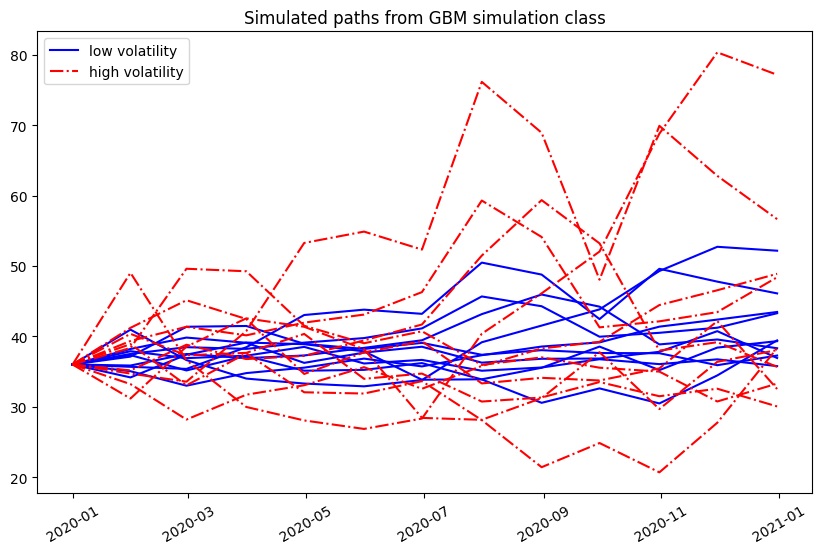

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
p1 = plt.plot(gbm.time_grid, paths_1[:, :10], 'b')
p2 = plt.plot(gbm.time_grid, pahts_2[:, :10], 'r-.')
l1 = plt.legend([p1[0], p2[0]], ['low volatility', 'high volatility'], loc=2)
# plt.gca().add_artist(11)
plt.xticks(rotation=30)
plt.title('Simulated paths from GBM simulation class')

## Jump Diffusion

<b>Stochastic differential equation for Merton jump diffusion model</b>
$$ dS_t = (r-r_J)S_t dt + \sigma S_tdZ_t+J_tS_tdN_t$$

<b>Euler discretization for Merton jump diffusion model</b>
$$ S_{t_{m+1}}=S_{t_m}\left(\exp\left(\left(r-r_f-\frac{\sigma^2}{2}\right)(t_{m+1}-t_m)+\sigma\sqrt{t_{m+1}-t_m}z_t^1\right)\left(e^{\mu_j+\delta_{z_t}^2}-1\right)y_t\right)\\
0\le t_m\le t_{m+1}\le T$$

### The Simulation Class

The Python code for the `dx.jump_diffution` simulation class follows. 

<table>
    <tr>
        <td>`lambda`</td>
        <td>Constant</td>
        <td>Yes</td>
        <td>Jump intensity (probability p.a.)</td>
    </tr>
    <tr>
        <td>`mu`</td>
        <td>Constant</td>
        <td>Yes</td>
        <td>Expected jump size</td>
    </tr>
    <tr>
        <td>'delta'</td>
        <td>Constant</td>
        <td>Yes</td>
        <td>Standard deviation of jump size</td>
    </tr>
</table>

This class needs further random numbers because of the jump component. Inline comments in the method `generate_paths()` highlight the two spots where these additional random numbers are generated.

### A Use Case

In [23]:
me_jd = market_environment('me_jd', dt.datetime(2020, 1, 1))

In [24]:
# The three additional parameters for the dx.jump_diffusion object. There are specific to the simulation class.
me_jd.add_constant('lambda', 0.3)
me_jd.add_constant('mu', -0.75)
me_jd.add_constant('delta', 0.1)

# adds a complete environment to the existing one
me_jd.add_environment(me_gbm)

from dx.jump_diffusion import jump_diffusion
jd = jump_diffusion('jd', me_jd)

In [25]:
# simulates the paths with the base parameters
%time paths_3 = jd.get_instrument_values()

CPU times: user 130 ms, sys: 11.8 ms, total: 142 ms
Wall time: 77.9 ms


In [26]:
# Increases the jump intensity parameters
jd.update(lamb=0.9)

In [27]:
# simulates the paths with the updated parameter
%time paths_4 = jd.get_instrument_values()

CPU times: user 52.7 ms, sys: 10.1 ms, total: 62.8 ms
Wall time: 61.5 ms


In [28]:
print(paths_4)

[[36.         36.         36.         ... 36.         36.
  36.        ]
 [37.08643805 39.72101844 38.99086852 ... 33.37698408 19.7873514
  37.96772623]
 [38.18909692 42.99245316 41.5169037  ... 36.50095052 20.70954205
  40.45897028]
 ...
 [46.44299979 29.03144652 27.04737349 ... 20.08985842  5.02761915
  56.43095736]
 [46.50850724 32.52524635 28.61980463 ... 20.63382691  4.9985556
  62.0326967 ]
 [46.72058869 30.68857725 31.28217321 ... 21.00791234  5.17560164
  75.18943879]]


Text(0.5, 1.0, 'Simulated paths from jump diffusion class')

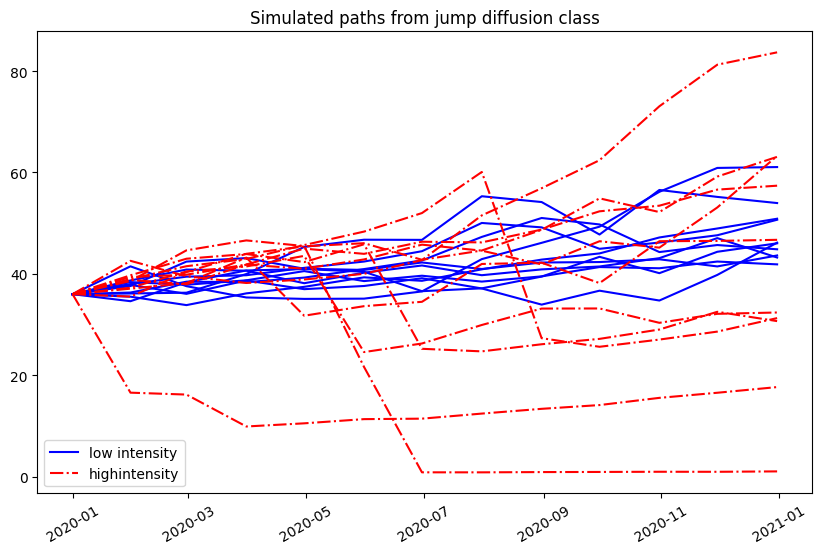

In [31]:
plt.figure(figsize=(10, 6))
p1 = plt.plot(gbm.time_grid, paths_3[:, :10], 'b')
p2 = plt.plot(gbm.time_grid, paths_4[:, :10], 'r-.')
l1 = plt.legend([p1[0], p2[0]], ['low intensity',   'highintensity'], loc=3)
# plt.gca().add_artist(11)
plt.xticks(rotation=30)
plt.title('Simulated paths from jump diffusion class')